<a href="https://www.kaggle.com/umbertofasci/happy-whales-and-dolphins-starter?scriptVersionId=86857544" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Happy Whales and Dolphins 🐬

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
print(f"Competition Files and Folders: {os.listdir('/kaggle/input/happy-whale-and-dolphin')}")

Competition Files and Folders: ['sample_submission.csv', 'train_images', 'train.csv', 'test_images']


Loading `train.csv` and `sample_submission.csv`.

In [3]:
train_df = pd.read_csv('/kaggle/input/happy-whale-and-dolphin/train.csv')
samp_submission_df = pd.read_csv('/kaggle/input/happy-whale-and-dolphin/sample_submission.csv')

Looking at `train_df` contents.

In [4]:
train_df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


Correcting incorrect spellings for sanity check purposes.
`kiler_whale` → `killer_whale`
`bottlenose_dolpin` → `bottlenose_dolphin`

In [5]:
train_df.loc[train_df.species == 'kiler_whale', 'species'] = 'killer_whale'
train_df.loc[train_df.species == 'bottlenose_dolpin', 'species'] = 'bottlenose_dolphin'

Looking at `sample_submission` contents.

In [6]:
samp_submission_df.head()

,image,predictions
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...


How many images, species, and individual IDs are present?

In [7]:
print(f"Images in train index file: {train_df.image.nunique()}")
print(f"Species in train index file: {train_df.species.nunique()}")
print(f"Individual IDs in train index file: {train_df.individual_id.nunique()}")

print(f"Images in train images folder: {len(os.listdir('/kaggle/input/happy-whale-and-dolphin/train_images'))}")
print(f"Images in test images folder: {len(os.listdir('/kaggle/input/happy-whale-and-dolphin/test_images'))}")

Images in train index file: 51033
Species in train index file: 28
Individual IDs in train index file: 15587
Images in train images folder: 51033
Images in test images folder: 27956


Species frequency within the train dataset.

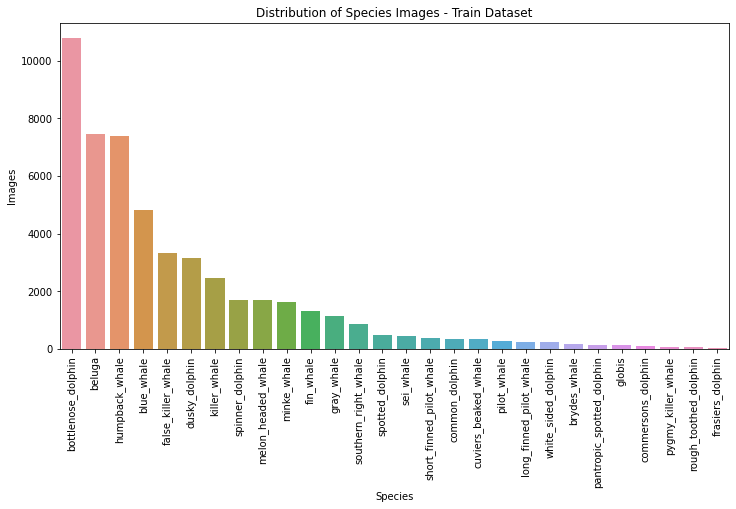

In [8]:
spec_freq = train_df["species"].value_counts()
df = pd.DataFrame({'Species': spec_freq.index,
                   'Images': spec_freq.values})
plt.figure(figsize = (12, 6))
plt.title('Distribution of Species Images - Train Dataset')
sns.set_color_codes("deep")
s = sns.barplot(x = "Species", y="Images", data=df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

Visualizing the Individual IDs found associated with each species.

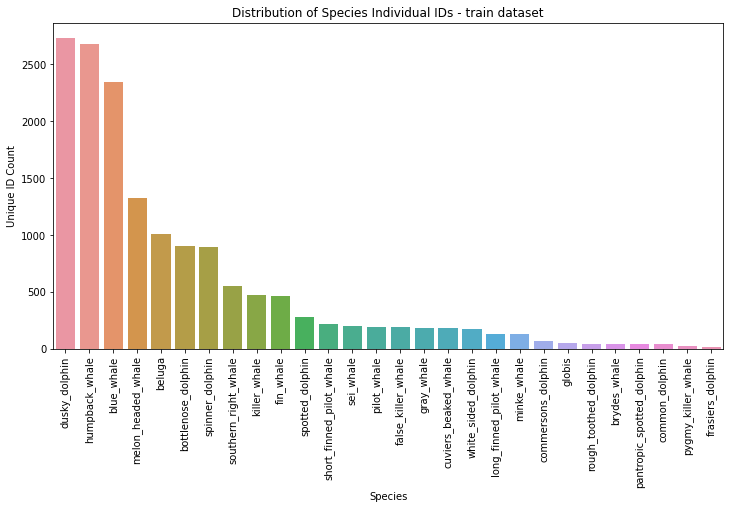

In [9]:
id_freq = train_df.groupby(["species"])["individual_id"].nunique()
df = pd.DataFrame({'Species': id_freq.index,
                   'Unique ID Count': id_freq.values
                  })
df = df.sort_values(['Unique ID Count'], ascending=False)
plt.figure(figsize = (12,6))
plt.title('Distribution of Species Individual IDs - train dataset')
sns.set_color_codes("deep")
s = sns.barplot(x = 'Species', y="Unique ID Count", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()


Checking if the images listed in `train_df` are identical with those found within the list of images in `train_images`.

In [10]:
train_df_list = list(train_df.image.unique())
train_images_list = list(os.listdir('/kaggle/input/happy-whale-and-dolphin/train_images'))
delta = set(train_df_list) & set(train_images_list) # iterable conversion
minus = set(train_df_list) - set(train_images_list) # difference between sets
print(f"Images in train dataset: {len(train_df_list)}\nImages in train folder: {len(train_images_list)}\nIntersection: {len(delta)}\nDifference: {len(minus)}")

Images in train dataset: 51033
Images in train folder: 51033
Intersection: 51033
Difference: 0


All the images present in `train_df` are also present in the `train_images` folder.

Creating a helper function which returns the shape of an image within `train_images`

In [11]:
def show_image_size(file_name):
    image = cv2.imread('/kaggle/input/happy-whale-and-dolphin/train_images/' + file_name)
    return list(image.shape)

Using a sample size of 2500 images, let's determine the image dimensions

As per competition format consideration import `time`

In [12]:
import time
sample_size = 2500
time_alpha = time.time() # start time
train_sample_df = train_df.sample(sample_size)
sample_img_func = np.stack(train_sample_df['image'].apply(show_image_size))
dimensions_df = pd.DataFrame(sample_img_func, columns=['width', 'height', 'c_channels'])
print(f"Total run time for {sample_size} images: {round(time.time()-time_alpha, 2)} sec.")


Total run time for 2500 images: 188.83 sec.


Now let's see how many different image dimensions are present in just 2500 image samples.

In [13]:
train_img_df = pd.concat([train_sample_df, dimensions_df], axis=1, sort=False)
print(f"Number of different image sizes in {2500} samples: {train_img_df.groupby(['width', 'height','c_channels']).count().shape[0]}")

Number of different image sizes in 2500 samples: 1341


More to come... 
1. Data Augmentation
2. Modeling